In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
http_response_data = pd.read_csv('http_response_status_data.csv', parse_dates=True, index_col='request_date')
http_response_data.head()

,response_code
request_date,
2016-09-29 10:28:36.516,200
2016-09-29 10:28:36.724,200
2016-09-29 10:21:57.558,200
2016-09-29 10:21:58.194,200
2016-09-29 10:28:58.039,200


In [3]:
def determine_response_class(row):
    """
    Check the status code of a given row, and return a response class.
    
    - 2xx: 'success'
    - 3xx: 'warning'
    - 4xx: 'client_error'
    - 5xx: 'server_error'
    - NaN or 0: 'unknown'
    """
    
    response_code = row['response_code']
    
    if response_code >= 200 and response_code < 300:
        return 'success'
    elif response_code >= 300 and response_code < 400:
        return 'warning'
    elif response_code >= 400 and response_code < 500:
        return 'client_error'
    elif response_code >= 500 and response_code < 600:
        return 'server_error'
    else:
        return 'unknown'

In [4]:
# Add 'Response class' column to API Logs, where response class is determined by HTTP status code
http_response_data['response_class'] = http_response_data.apply(determine_response_class, axis='columns')

http_response_data

,response_code,response_class
request_date,,
2016-09-29 10:28:36.516,200,success
2016-09-29 10:28:36.724,200,success
2016-09-29 10:21:57.558,200,success
2016-09-29 10:21:58.194,200,success
2016-09-29 10:28:58.039,200,success
2016-09-29 06:49:49.525,302,warning
2016-09-29 11:32:54.275,201,success
2016-09-29 11:32:54.410,201,success
2016-09-29 06:56:47.073,200,success


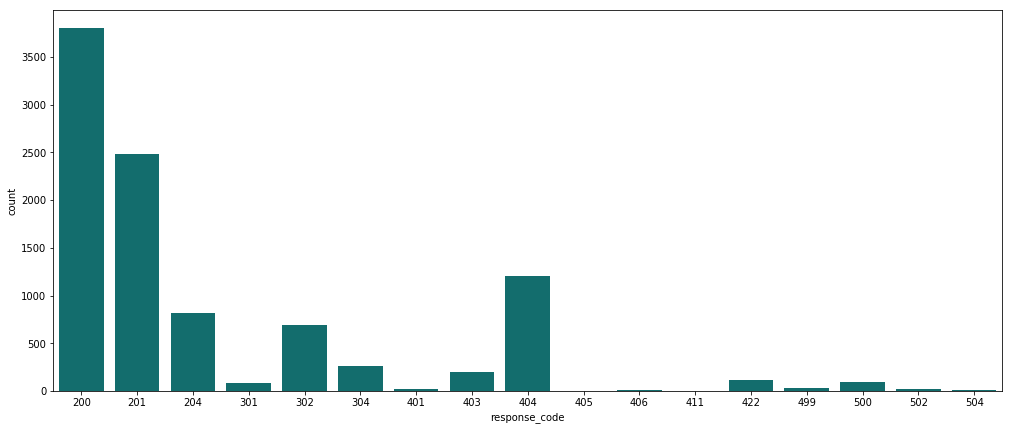

In [5]:
# Make the plot wider and taller
plt.figure(figsize=(17,7))

# Use seaborn to produce a countplot of response status codes
status_code_counts_plot = sns.countplot(
    x='response_code',
    data=http_response_data,
    color='teal',
    saturation=0.7)

/home/brylie/anaconda3/envs/tmp-http-visualization/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


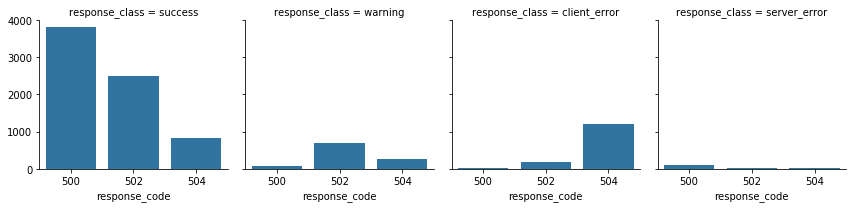

In [6]:
grid = sns.FacetGrid(http_response_data, col='response_class')

grid.map(sns.countplot, 'response_code')